In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [132]:
dirname=os.getcwd()
path_parent = os.path.dirname(os.getcwd())
print(path_parent)

C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project


In [133]:
qb_df = pd.read_csv(os.path.join(path_parent, "Data\\Clean_Data\\qbs.csv"))

In [134]:
qb_df['probowl']=0

In [135]:
for index, row in qb_df.iterrows():
    if "*" in row['Player']:
        row['probowl'] = 1
        qb_df.loc[index, 'probowl'] = 1

## Quarterback Random Forest (All Variables) [1]

In [136]:
qb_df_features = qb_df.iloc[:,8:]
qb_df_features = qb_df_features.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)

In [137]:
check = qb_df_features[['QBrec','Rec_Ctch%']]
check.sort_values(by=['QBrec','Rec_Ctch%'], ascending=False).head()

,QBrec,Rec_Ctch%
1472,1-1-0,0
1403,1-0-0,0
1414,1-0-0,0
1419,1-0-0,0
1426,1-0-0,0


In [138]:
qb_df_features.dtypes

GS              int64
Rush_Att        int64
Rush_Yds        int64
Rush_TD         int64
Rush_1D         int64
Rush_Lng        int64
Rush_Y/A      float64
Rush_Y/G      float64
Rush_Fmb        int64
Rec_Tgt         int64
Rec_Rec         int64
Rec_Ctch%      object
Rec_Yds         int64
Rec_Y/R       float64
Rec_TD          int64
Rec_1D          int64
Rec_Lng         int64
Rec_Y/Tgt     float64
Rec_R/G       float64
Rec_Y/G       float64
Rec_Fmb         int64
Pass_Cmp        int64
Pass_Att        int64
Pass_Cmp%     float64
Pass_Yds        int64
Pass_TD         int64
Pass_TD%      float64
Pass_Int        int64
Pass_Int%     float64
Pass_1D         int64
Pass_Lng        int64
Pass_Y/A      float64
Pass_AY/A     float64
Pass_Y/C      float64
Pass_Y/G      float64
Pass_Rate     float64
Pass_QBR      float64
Pass_Sk         int64
Pass_Yds.1      int64
Pass_Sk%      float64
Pass_NY/A     float64
Pass_ANY/A    float64
Pass_4QC        int64
Pass_GWD        int64
QBrec          object
probowl   

In [139]:
#Drop QBrec column from qb_df_features
qb_df_features.drop(columns=['QBrec'], inplace=True)
qb_df_features.columns

Index(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec', 'Rec_Ctch%',
       'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng', 'Rec_Y/Tgt',
       'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp', 'Pass_Att', 'Pass_Cmp%',
       'Pass_Yds', 'Pass_TD', 'Pass_TD%', 'Pass_Int', 'Pass_Int%', 'Pass_1D',
       'Pass_Lng', 'Pass_Y/A', 'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G',
       'Pass_Rate', 'Pass_QBR', 'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%',
       'Pass_NY/A', 'Pass_ANY/A', 'Pass_4QC', 'Pass_GWD', 'probowl'],
      dtype='object')

In [140]:
#Change all 'object' columns to float, then classifier will run.
qb_df_features['Rec_Ctch%'] = qb_df_features['Rec_Ctch%'].str.rstrip("%").astype(float)/100

In [82]:
train1, test1 = train_test_split(qb_df_features, test_size=0.333, stratify=qb_df_features['probowl'])

In [83]:
train_y1 = train1['probowl']
train_x1=train1.drop(columns=['probowl'])
test_y1=test1['probowl']
test_x1=test1.drop(columns=['probowl'])

In [84]:
#The param_grid in the next cell was edited iteratively until suitable parameters were identified.

In [85]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [120,130,140],
    'max_features': [11,12,13],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [10,12,13],
    'n_estimators': [30,45,60]
}
rf = RandomForestClassifier()
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [86]:
grid_search1.fit(train_x1, train_y1)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [120, 130, 140],
                         'max_features': [11, 12, 13],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 12, 13],
                         'n_estimators': [30, 45, 60]},
             verbose=2)

In [87]:
grid_search1.best_params_

{'bootstrap': True,
 'max_depth': 120,
 'max_features': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 30}

In [88]:
rf_mod1 = grid_search1.best_estimator_
print(rf_mod1)
rfc_pred1 = rf_mod1.predict(test_x1)

RandomForestClassifier(max_depth=120, max_features=11, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=30)


In [89]:
print(confusion_matrix(test_y1,rfc_pred1))

[[427  22]
 [ 19  39]]


In [90]:
print(classification_report(test_y1, rfc_pred1))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       449
           1       0.64      0.67      0.66        58

    accuracy                           0.92       507
   macro avg       0.80      0.81      0.80       507
weighted avg       0.92      0.92      0.92       507



In [91]:
rfc_prob1 = rf_mod1.predict_proba(test_x1)

In [92]:
test_rfc_y1_2 = test_y1.to_numpy()
roc_auc_score(test_rfc_y1_2, rfc_prob1[:,1])

0.9455110974579526

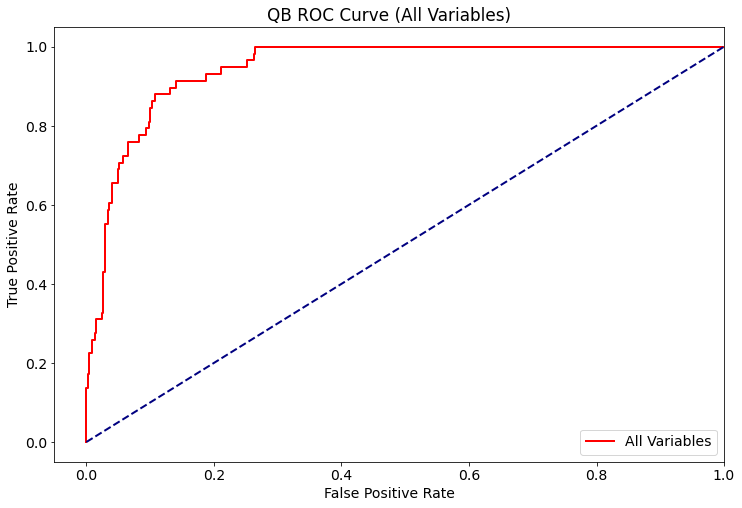

In [93]:
fpr_rfc_1, tpr_rfc_1, _ = roc_curve(test_rfc_y1_2, rfc_prob1[:,1])
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='red', lw=2, label="All Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QB ROC Curve (All Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\QBs\ROC_All.jpg'), bbox_inches='tight')

## Quarterback Random Forest (Only Passing Variables) [2]

In [94]:
qb_df_features2 = qb_df.iloc[:,8:]
qb_df_features2 = qb_df_features2.drop(['Player*','Year','PlayerYearTm*','Pos*','QBrec'], axis=1)
qb_df_features2 = qb_df_features2[qb_df_features2.columns.drop(list(qb_df.filter(regex='Rec')))]
qb_df_features2 = qb_df_features2[qb_df_features2.columns.drop(list(qb_df.filter(regex='Rush')))]
print(qb_df_features2.columns)
qb_df_features2.head()

Index(['GS', 'Pass_Cmp', 'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD',
       'Pass_TD%', 'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR', 'Pass_Sk',
       'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A', 'Pass_4QC',
       'Pass_GWD', 'probowl'],
      dtype='object')


,GS,Pass_Cmp,Pass_Att,Pass_Cmp%,Pass_Yds,Pass_TD,Pass_TD%,Pass_Int,Pass_Int%,Pass_1D,...,Pass_Rate,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,probowl
0,16,297,474,62.7,3937,33,7.0,16,3.4,188,...,98.0,0.0,34,181,6.7,7.39,7.28,3,4,1
1,16,284,473,60.0,3430,28,5.9,11,2.3,177,...,92.4,0.0,28,124,5.6,6.60,6.73,3,4,1
2,16,330,569,58.0,3365,21,3.7,13,2.3,181,...,77.8,0.0,45,262,7.3,5.05,4.79,2,3,1
3,11,151,289,52.2,1860,11,3.8,8,2.8,91,...,73.6,0.0,30,150,9.4,5.36,4.92,1,1,0
4,16,233,428,54.4,2769,18,4.2,13,3.0,142,...,75.8,0.0,37,240,8.0,5.44,4.95,3,3,0


In [95]:
#Change all % columns to float, then classifier will run.


In [96]:
train2, test2 = train_test_split(qb_df_features2, test_size=0.333, stratify=qb_df_features2['probowl'])

In [97]:
train_y2 = train2['probowl']
train_x2=train2.drop(columns=['probowl'])
test_y2=test2['probowl']
test_x2=test2.drop(columns=['probowl'])

In [98]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [90,100,110],
    'max_features': [1,2,3,4],
    'min_samples_leaf': [5,7,9],
    'min_samples_split': [10,11,12],
    'n_estimators': [110,120,130]
}
rf = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [99]:
# Fit the grid search to the data
grid_search2.fit(train_x2, train_y2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, 110],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [110, 120, 130]},
             verbose=2)

In [100]:
grid_search2.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 10,
 'n_estimators': 130}

In [101]:
rf_mod2 = grid_search2.best_estimator_
print(rf_mod2)
rfc_pred2 = rf_mod2.predict(test_x2)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=9,
                       min_samples_split=10, n_estimators=130)


In [102]:
print(confusion_matrix(test_y2,rfc_pred2))

[[442   7]
 [ 25  33]]


In [103]:
print(classification_report(test_y2, rfc_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       449
           1       0.82      0.57      0.67        58

    accuracy                           0.94       507
   macro avg       0.89      0.78      0.82       507
weighted avg       0.93      0.94      0.93       507



In [104]:
rfc_prob2 = rf_mod2.predict_proba(test_x2)

In [105]:
test_rfc_y2_2 = test_y2.to_numpy()
roc_auc_score(test_rfc_y2_2, rfc_prob2[:,1])

0.9716227632286307

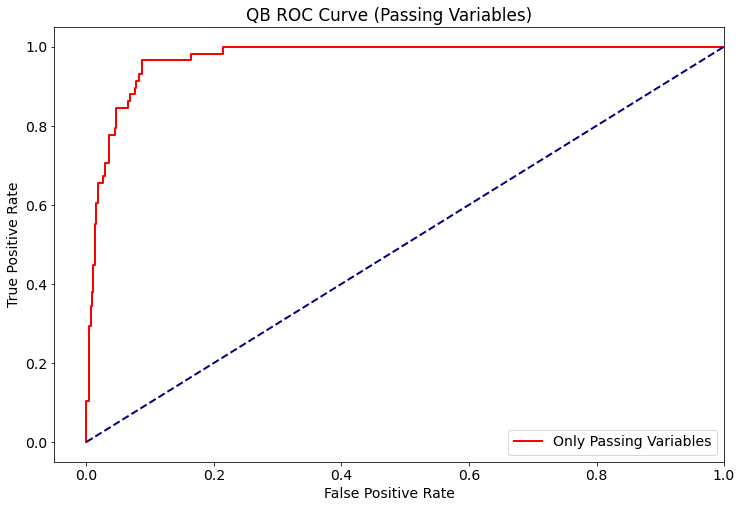

In [106]:
fpr_rfc_2, tpr_rfc_2, _ = roc_curve(test_rfc_y2_2, rfc_prob2[:,1])
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="Only Passing Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QB ROC Curve (Passing Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\QBs\ROC_Passing.jpg'), bbox_inches='tight')

## Visualize feature importance for all variables

In [107]:
print(type(rf_mod1.feature_importances_))
print(len(rf_mod1.feature_importances_))

<class 'numpy.ndarray'>
44


In [108]:
feat = qb_df_features.columns.to_list()
arr = np.array(feat)
print(len(arr))
arr

45


array(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec',
       'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng',
       'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD', 'Pass_TD%',
       'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR',
       'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A',
       'Pass_4QC', 'Pass_GWD', 'probowl'], dtype='<U10')

In [109]:
#Drop probowl column 
arr = arr[0:44]
print(len(arr))

44


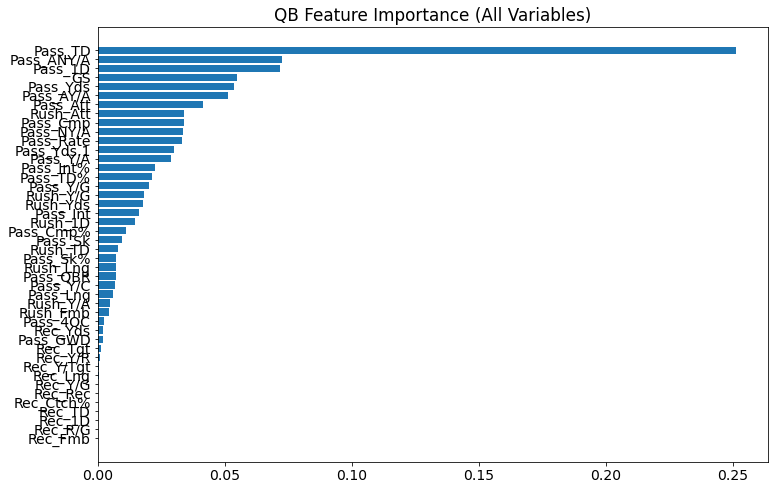

In [110]:
sorted_idx = rf_mod1.feature_importances_.argsort()
plt.barh(arr[sorted_idx], rf_mod1.feature_importances_[sorted_idx])
plt.title('QB Feature Importance (All Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\QBs\FeatureImportance_All.jpg'), bbox_inches='tight')

## Visualize feature importance for only receiving variables

In [111]:
print(type(rf_mod2.feature_importances_))
print(len(rf_mod2.feature_importances_))
rf_mod2.feature_importances_

<class 'numpy.ndarray'>
24


array([0.05158557, 0.07482062, 0.06123508, 0.01157274, 0.094486  ,
       0.09550914, 0.04256601, 0.02576602, 0.02269907, 0.10863487,
       0.01113458, 0.02091684, 0.06441362, 0.01019218, 0.04377459,
       0.0380759 , 0.03246864, 0.01424667, 0.01751932, 0.00881227,
       0.04990916, 0.07125181, 0.0111703 , 0.01723901])

In [112]:
feat = qb_df_features2.columns.to_list()
arr2 = np.array(feat)

In [113]:
print(len(arr2))
arr2

25


array(['GS', 'Pass_Cmp', 'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD',
       'Pass_TD%', 'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng',
       'Pass_Y/A', 'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate',
       'Pass_QBR', 'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A',
       'Pass_ANY/A', 'Pass_4QC', 'Pass_GWD', 'probowl'], dtype='<U10')

In [114]:
#Drop probowl column
arr2=arr2[0:24]
print(len(arr2))

24


Sort the feature importance

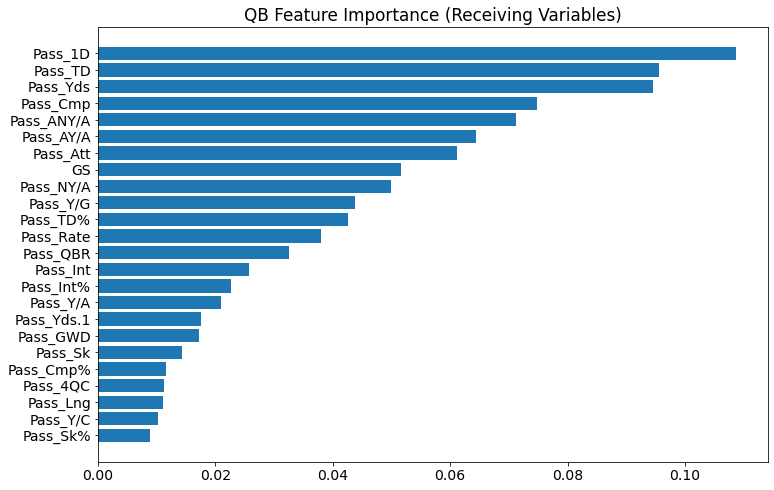

In [115]:
sorted_idx = rf_mod2.feature_importances_.argsort()
plt.barh(arr2[sorted_idx], rf_mod2.feature_importances_[sorted_idx])
plt.title('QB Feature Importance (Receiving Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\QBs\FeatureImportance_Passing.jpg'), bbox_inches='tight')

## RF Model with only the top 11 variables [3]

In [116]:
top_qb_features = qb_df[['Pass_Yds','Pass_Att','Pass_1D','Pass_Cmp','Pass_Y/G','Pass_ANY/A','Pass_Rate','Pass_AY/A','Pass_TD','GS','Pass_QBR','probowl']]
top_qb_features.head()

,Pass_Yds,Pass_Att,Pass_1D,Pass_Cmp,Pass_Y/G,Pass_ANY/A,Pass_Rate,Pass_AY/A,Pass_TD,GS,Pass_QBR,probowl
0,3937,474,188,297,246.1,7.28,98.0,8.2,33,16,0.0,1
1,3430,473,177,284,214.4,6.73,92.4,7.4,28,16,0.0,1
2,3365,569,181,330,210.3,4.79,77.8,5.6,21,16,0.0,1
3,1860,289,91,151,116.3,4.92,73.6,6.0,11,11,0.0,0
4,2769,428,142,233,173.1,4.95,75.8,5.9,18,16,0.0,0


In [117]:
train3, test3 = train_test_split(top_qb_features, test_size=0.333, stratify=top_qb_features['probowl'])
train_y3 = train3['probowl']
train_x3=train3.drop(columns=['probowl'])
test_y3=test3['probowl']
test_x3=test3.drop(columns=['probowl'])

In [118]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [90,100,110,120],
    'max_features': [3,4,5,6],
    'min_samples_leaf': [7,9,11,13],
    'min_samples_split': [10,12,13,14],
    'n_estimators': [70,85,100]
}
rf = RandomForestClassifier()
grid_search3 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [119]:
# Fit the grid search to the data
grid_search3.fit(train_x3, train_y3)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, 110, 120],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [7, 9, 11, 13],
                         'min_samples_split': [10, 12, 13, 14],
                         'n_estimators': [70, 85, 100]},
             verbose=2)

In [120]:
grid_search3.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 12,
 'n_estimators': 70}

In [121]:
rf_mod3 = grid_search3.best_estimator_
print(rf_mod3)
rfc_pred3 = rf_mod3.predict(test_x3)

RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=11,
                       min_samples_split=12, n_estimators=70)


In [122]:
print(confusion_matrix(test_y3,rfc_pred3))

[[438  11]
 [ 23  35]]


In [123]:
print(classification_report(test_y3, rfc_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       449
           1       0.76      0.60      0.67        58

    accuracy                           0.93       507
   macro avg       0.86      0.79      0.82       507
weighted avg       0.93      0.93      0.93       507



In [124]:
rfc_prob3 = rf_mod3.predict_proba(test_x3)

In [125]:
test_rfc_y3_2 = test_y3.to_numpy()
roc_auc_score(test_rfc_y3_2, rfc_prob3[:,1])

0.9569541509868674

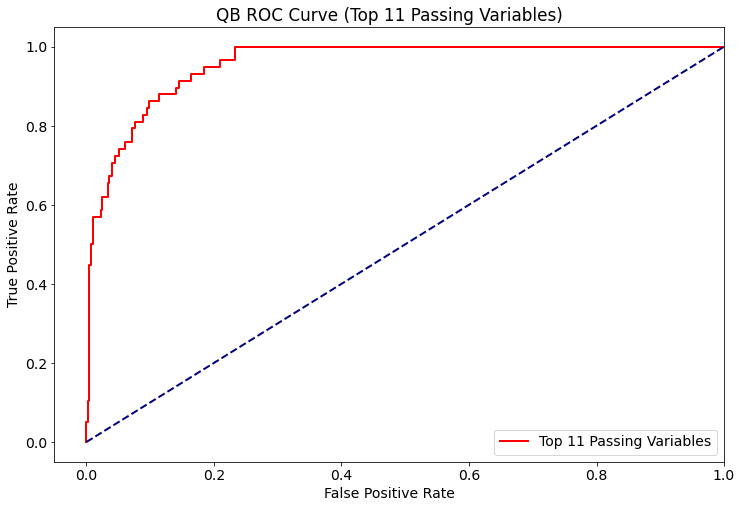

In [126]:
fpr_rfc_3, tpr_rfc_3, _ = roc_curve(test_rfc_y3_2, rfc_prob3[:,1])
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='red', lw=2, label="Top 11 Passing Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QB ROC Curve (Top 11 Passing Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\QBs\ROC_Top11Passing.jpg'), bbox_inches='tight')

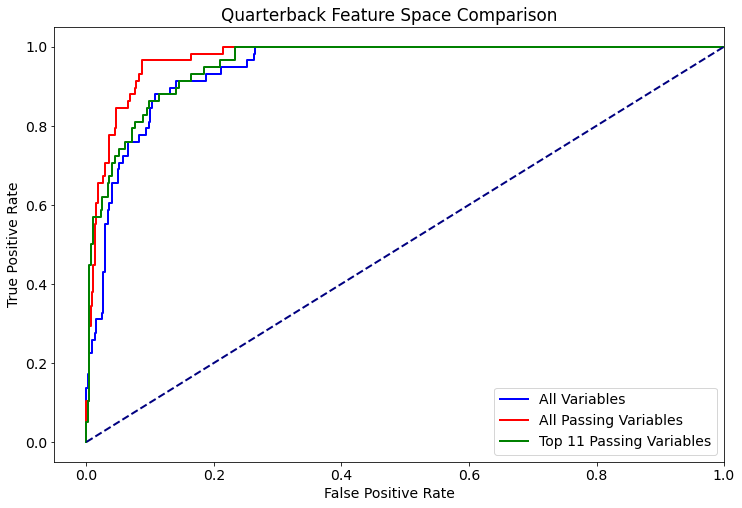

In [127]:
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='blue', lw=2, label="All Variables")
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="All Passing Variables")
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='green', lw=2, label="Top 11 Passing Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Quarterback Feature Space Comparison')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\QBs\ROC_Comparison.jpg'), bbox_inches='tight')

In [128]:
print('ALL VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y1,rfc_pred1))
print("\n Classification Report: ")
print(classification_report(test_y1, rfc_pred1))

ALL VARIABLES: 

Confusion Matrix:
[[427  22]
 [ 19  39]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       449
           1       0.64      0.67      0.66        58

    accuracy                           0.92       507
   macro avg       0.80      0.81      0.80       507
weighted avg       0.92      0.92      0.92       507



In [129]:
print('ONLY PASSING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y2,rfc_pred2))
print("\n Classification Report: ")
print(classification_report(test_y2, rfc_pred2))

ONLY PASSING VARIABLES: 

Confusion Matrix:
[[442   7]
 [ 25  33]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       449
           1       0.82      0.57      0.67        58

    accuracy                           0.94       507
   macro avg       0.89      0.78      0.82       507
weighted avg       0.93      0.94      0.93       507



In [130]:
print('TOP 11 PASSING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y3,rfc_pred3))
print("\n Classification Report: ")
print(classification_report(test_y3, rfc_pred3))

TOP 11 PASSING VARIABLES: 

Confusion Matrix:
[[438  11]
 [ 23  35]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       449
           1       0.76      0.60      0.67        58

    accuracy                           0.93       507
   macro avg       0.86      0.79      0.82       507
weighted avg       0.93      0.93      0.93       507



**All 3 random forest models result in an F1-Score of 0.96 for identifying non-Pro-Bowl Quarterbacks**

Using all variables and the top 11 passing variables result in a F1-score of 0.67. The model with the top 11 variables will be better at generalizing, and thus, is the superior model.

The F1-score for all passing variables is 0.60.